In [4]:
#Importing necessary Libaries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [5]:
#Creating Data Frame for the csv
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

Total 1338 rows and 7 Features

In [8]:
#Data Type check for each features
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
print(' count unique values of sex are :' ,df['sex'].nunique(),' and unique values are ', df['sex'].unique())
      


 count unique values of sex are : 2  and unique values are  ['female' 'male']


The Data types of various data items in the data set are 

Age - Ordibal Data - Integer
Sex - is an Object data, so sex is a categorical data , and this has only two values, we need to plot the what are the types of values for the sex,
    and those are male anb female, This is kind Object data and encoding might be required
    Cell number 17 result says, sex has no null values  too
    
BMI - BMI data type is float, and this is continuous data, no nulls
children - number of childrens are continuos data
smoker - seems a categorical data
region is an object data, seems a categorical data
Charges are continuos data, here it is the Target variable and we can confirm now this is a Regression problem

In [10]:
#Need to check if any missing values in each of the data items

df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###  Visualization Of Data

In [13]:
#Lets plot fist visualization of nominal Data like, sex,smoker, Region

#importing the necessary libraries 
import seaborn as sns

male      676
female    662
Name: sex, dtype: int64


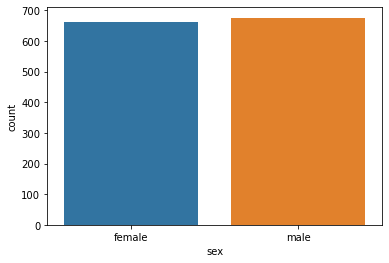

In [14]:
#feature sex plotting
ax=sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

 male and female counts are almost matching and equally distributed

no     1064
yes     274
Name: smoker, dtype: int64


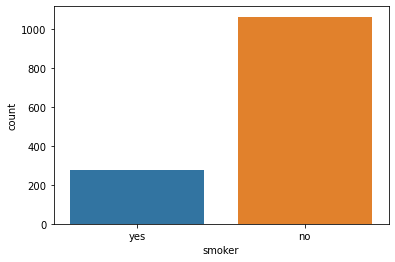

In [15]:
#feture smoker  plotting
ax=sns.countplot(x='smoker',data=df)
print(df['smoker'].value_counts())

Total count matches for smoker also

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


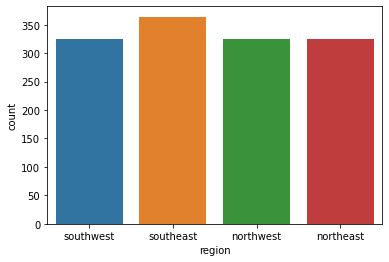

In [16]:
#Taking count of region Data feature

ax=sns.countplot(x='region',data=df)
print(df['region'].value_counts())

Total count matches for regions also

##Checkcing the Distribution Of Data

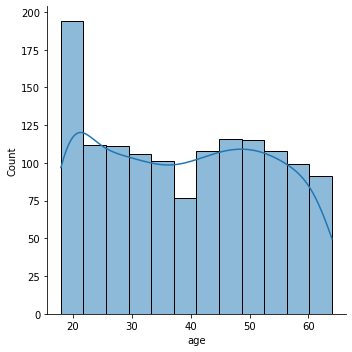

In [17]:
#Plotting dist plot for checking the distribution of data
#Age
import seaborn as sns
sns.displot(df['age'],kde=True)

Distribution of Age seems normal

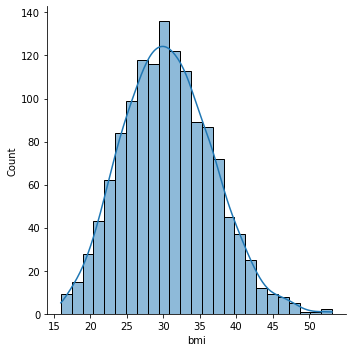

In [18]:
#Distribution of BMI

import seaborn as sns
sns.displot(df['bmi'],kde=True)

 BMI diatribution also normal

<AxesSubplot:xlabel='children', ylabel='Density'>

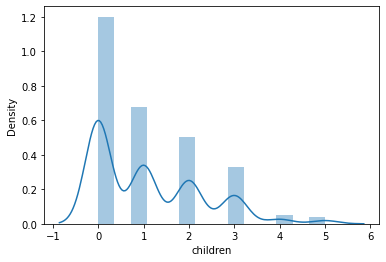

In [19]:
sns.distplot(df['children'], kde= True)

### Encoding the Data

The Object features, sex, region, and smoker are of Object data, and Categorical in nature, and this needs to be encoded

In [20]:
#Encode gender labels as 1 = Male and 0 = Female
df.sex.value_counts()
values = {'male': 1,
         'female':0}
df['sex'].replace(values,inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [21]:
df.sex.value_counts()

1    676
0    662
Name: sex, dtype: int64

In [22]:
# Encode smoker labels as 0 = No and 1 = Yes
Values = {"no": 0,
         "yes":1}
df['smoker'].replace(Values,inplace= True)

In [23]:
df.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [24]:
#Encode the Region Data using Get Dummies

df = pd.get_dummies(df, columns=['region'],drop_first = True)

In [49]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [25]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


We need to check the Correlation now

<AxesSubplot:>

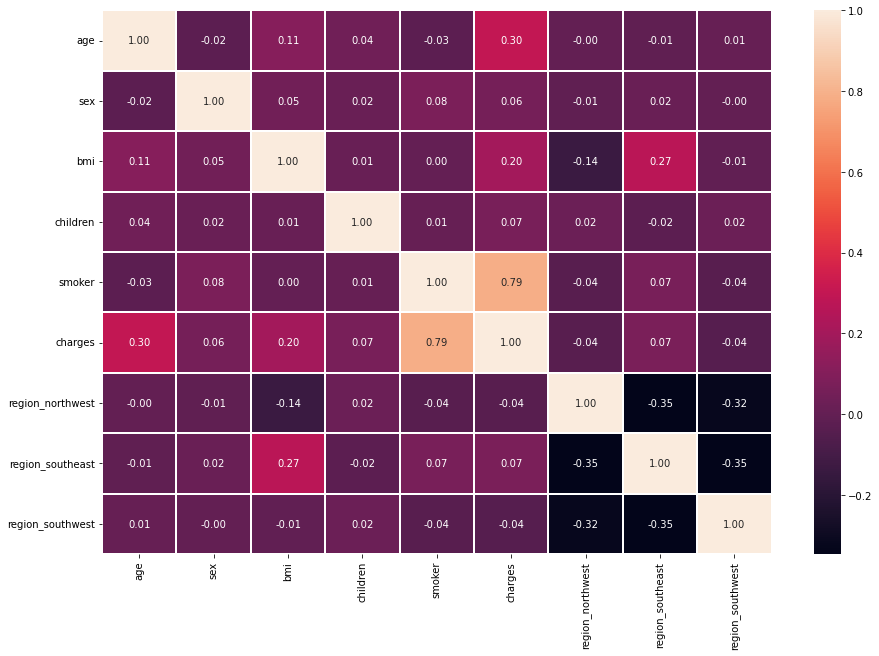

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='white',fmt='0.2f')

#It is found that the Smoking habit and charges are highly correlated

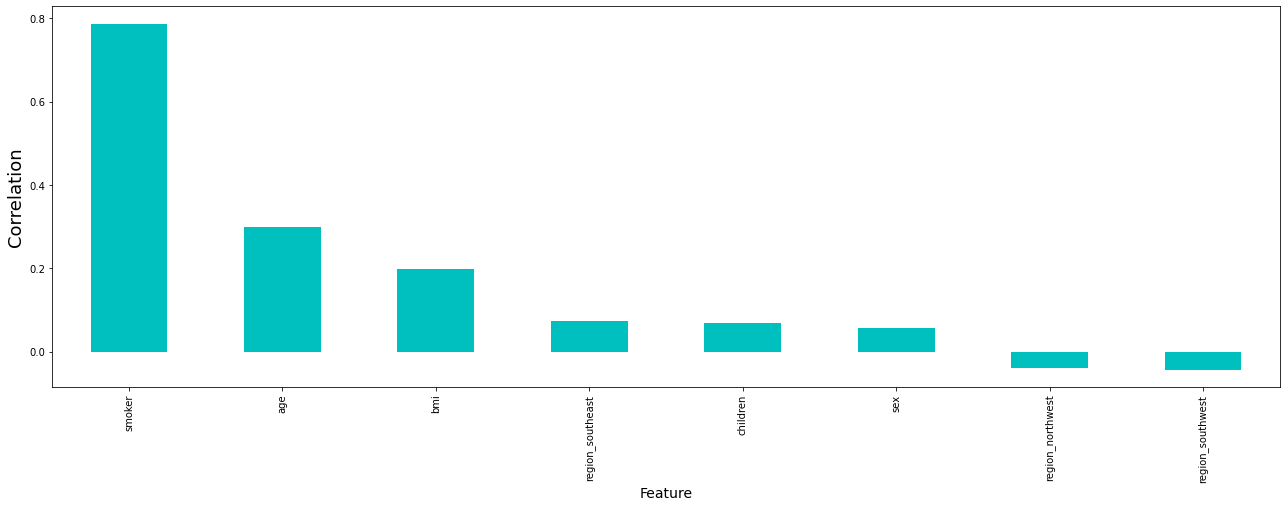

In [27]:
#Lets visualize the heatmap using a bar plot

plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation',fontsize=18)
plt.show()

we can now confirm that the smoker has high correlation with Charges

In [28]:
df.corr()['charges'].sort_values()

region_southwest   -0.043210
region_northwest   -0.039905
sex                 0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker              0.787251
charges             1.000000
Name: charges, dtype: float64

In [29]:
#Lets check the skewness of the Data, asuming the skewness is less

df.skew()

age                 0.055673
sex                -0.020951
bmi                 0.284047
children            0.938380
smoker              1.464766
charges             1.515880
region_northwest    1.200409
region_southeast    1.025621
region_southwest    1.200409
dtype: float64

Keeping the range of skewness from -0.5 t0 + 0.5,

none of the continuos data has skewness except Charges, which is target varuable, so no skewness treatmeng is required


### Outliers check

In [30]:
df.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

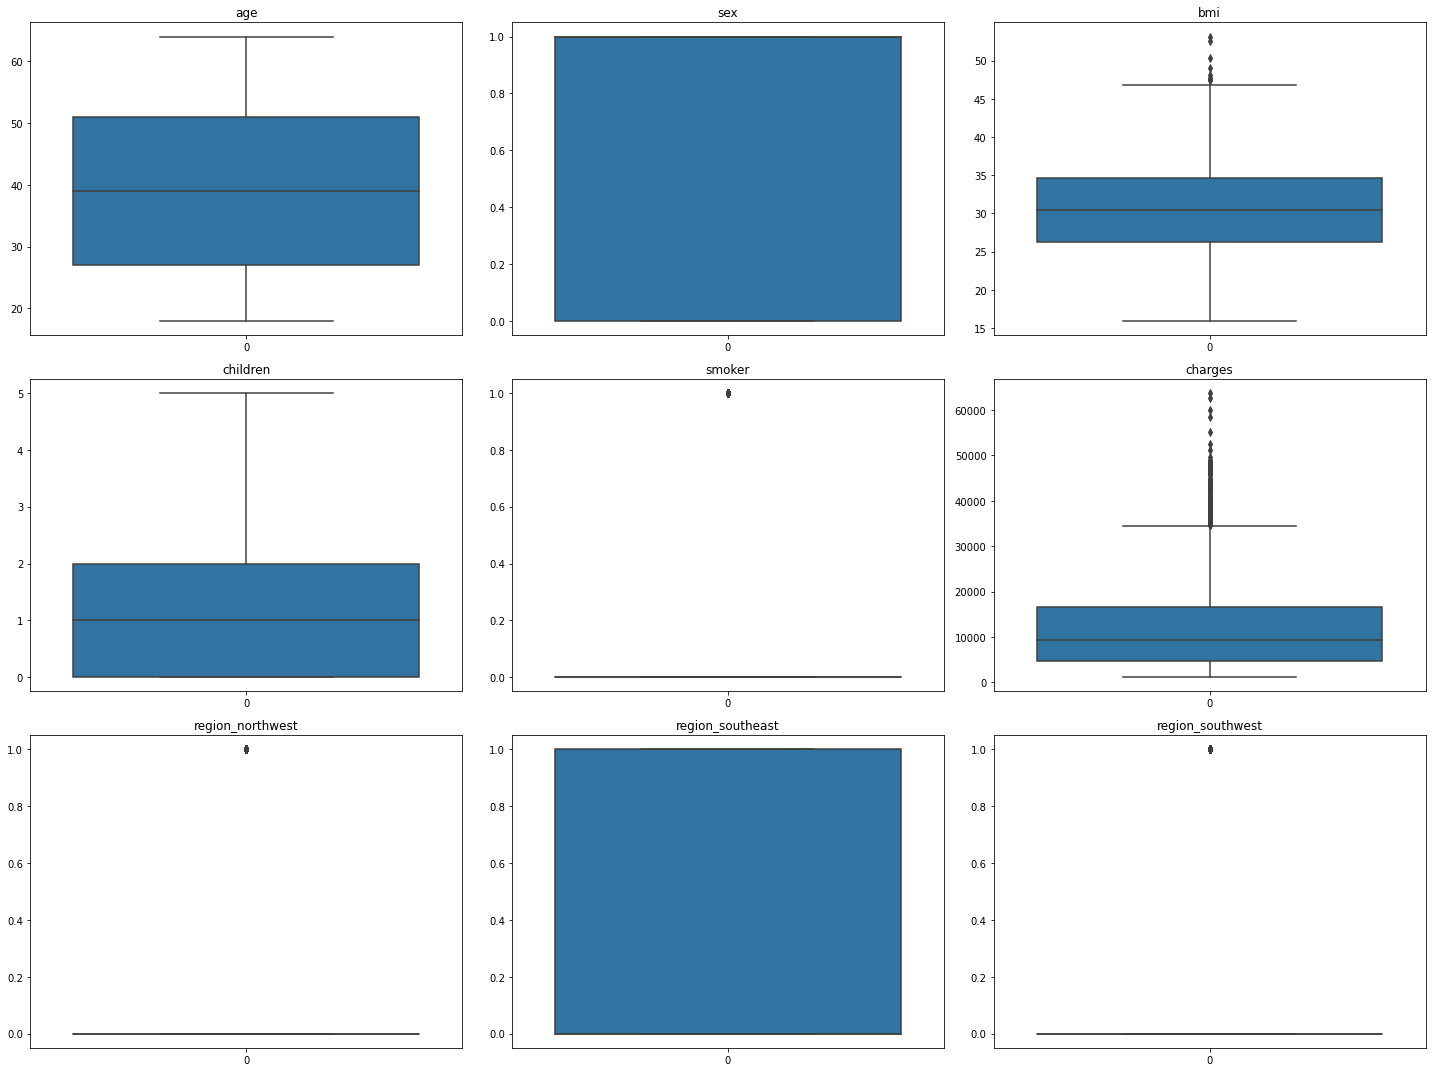

In [31]:
#Plottig Box plot for outlier check

plt.figure(figsize=(20,15),facecolor='white')
import matplotlib.pyplot as plt 
pt=1
for i in df.columns:
    if pt<=len(df.columns):
        plt.subplot(3,3,pt)
        sns.boxplot(data=df[i])
        plt.title(i)
    pt+=1
plt.tight_layout()

#There are outliers for BMI and charges, we need to treat outliers, Charges is our Target variable and cannot treat outliers for target variable

#### Treatment of outliers using zscore

In [32]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 5, 3, 2, 3, 3, 3, 3, 5, 3, 5, 3, 5, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 5, 5, 3, 3, 5, 2], dtype=int64))

In [33]:
#Just checking the values for Z>3 
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [34]:
#Loss calculation
print('Percentage of data loss =', ((1338-1309)/1338)*100)

Percentage of data loss = 2.167414050822123


So Data loss is approximately 2% whcih is negligibly small, and we no need to remove any outliers

## Separation of Features and Labels

In [35]:
features=df.drop('charges',axis=1)
target=df['charges']

### Scaling the Data

In [36]:
# Importing Libraries
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_roc_curve

In [37]:
#Finding best random state variable

maxAcc = 0
maxRS = 0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    
    r2_acc_train = r2_score(target_train,pred_train)
    r2_acc_test = r2_score(target_test,pred_test)
    if r2_acc_train == r2_acc_test:
        break
        #maxAcc = r2_acc_test
        #maxRs=i
    #print(f'at random stage {i}, the training accuracy is, {r2_score(target_train,pred_train)}')
    #print(f'at random stage {i}, the testing accuracy is, {r2_score(target_test,pred_test)}')
    #print('\n')
print(f"Best Accuracy is: {r2_acc_train} on Random State: {i}")
    
    
    

Best Accuracy is: 0.7523403697734907 on Random State: 99


At Random state 99 both training and Testing score are equal we can choose 99 is the random state

In [38]:
#Train Test Split at Random satate - 99
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=99)

In [39]:
#Fit the model

lr.fit(features_train,target_train)

LinearRegression()

In [40]:
#Predict the model4

pred_test= lr.predict(features_test)

In [41]:
print(r2_score(target_test,pred_test))

0.7401927175307581


In [42]:
train_accuracy=r2_score(target_train,pred_train)
test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target, cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the CV score is {cv_mean} and accuracy for testing is {test_accuracy}')
    print('\n')

at cross fold 2 the CV score is 0.7486831099334202 and accuracy for testing is 0.7401927175307581


at cross fold 3 the CV score is 0.7442470405616105 and accuracy for testing is 0.7401927175307581


at cross fold 4 the CV score is 0.7460373358279182 and accuracy for testing is 0.7401927175307581


at cross fold 5 the CV score is 0.7468616243473741 and accuracy for testing is 0.7401927175307581


at cross fold 6 the CV score is 0.745480111939616 and accuracy for testing is 0.7401927175307581


at cross fold 7 the CV score is 0.7448438756563397 and accuracy for testing is 0.7401927175307581


at cross fold 8 the CV score is 0.7427412192050877 and accuracy for testing is 0.7401927175307581


at cross fold 9 the CV score is 0.7429546124347848 and accuracy for testing is 0.7401927175307581




In [43]:
#Acucracy seems same for all the folds , we will check cv fold as 2 is taken 

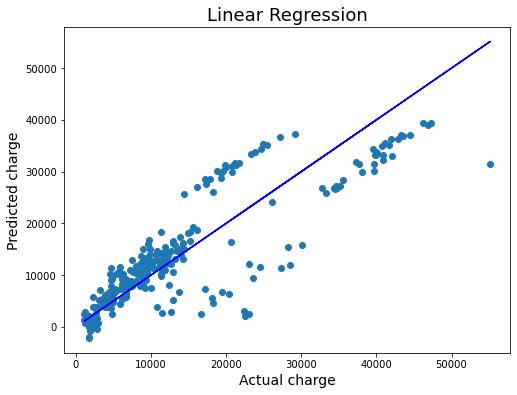

In [44]:
#LR Plotting

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test)
plt.plot(target_test,target_test, color='b')
plt.xlabel('Actual charge',fontsize=14)
plt.ylabel('Predicted charge',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('Medical_Cost_Personal Insurance.jpg')
plt.show()

Best Fit line covers most of the data points

In [45]:
#need to check with Other models as well

In [51]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
l1= []
l2=[]
#DT Algorithm check
dt=DecisionTreeRegressor()
dt.fit(features_train,target_train)
pred_train=dt.predict(features_test)
dt.score(features_train,target_train)
r2_acc_train = r2_score(target_test,pred_train)
r2_acc_test = r2_score(target_test,pred_test)
#train_accuracy=r2_score(target_train,pred_train)
#test_accuracy=r2_score(target_test,pred_test)
print('DT Training Score :', r2_acc_train,'\n','DT Testing Score :' ,r2_acc_test)
l1.append('Decision Tree')
l2.append(dt.score)

DT Training Score : 0.7135983329281159 
 DT Testing Score : 0.7401927175307581


In [48]:
# Now find the predict the same using different algorithms

#RF Algorithm check
rf=RandomForestRegressor()
rf.fit(features_train,target_train)
pred_train=rf.predict(features_test)
rf.score(features_train,target_train)
r2_acc_train = r2_score(target_test,pred_train)
r2_acc_test = r2_score(target_test,pred_test)
#train_accuracy=r2_score(target_train,pred_train)
#test_accuracy=r2_score(target_test,pred_test)
print( 'RFTraining Score: ',r2_acc_train, '\n','RF Testing score: ', r2_acc_test)
l1.append('Random Forest Regressor')
l2.append(rf.score)

RFTraining Score:  0.8256318618408098 
 RF Testing score:  0.7401927175307581


In [60]:
#KNN Algorithm check
knn=KNeighborsRegressor(n_neighbors = 5)
knn.fit(features_train,target_train)
pred_train=knn.predict(features_test)
#knn.score(features_train,target_train)
#r2_acc_train = r2_score(target_test,pred_train)
r2_acc_test = r2_score(target_test,pred_test)
#train_accuracy=r2_score(target_train,pred_train)
#test_accuracy=r2_score(target_test,pred_test)
print('KNN  Testing score: ', r2_acc_test)
l1.append('Random Forest Regressor')
l2.append(knn.score)

KNN  Testing score:  0.7401927175307581


## Regularization

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [110]:
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],
           'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls, parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [111]:
#Final model Training
ls=Lasso(alpha=10,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)

ls_score_training*100

75.22972175512785

Score is slightly improved with Regularization

In [112]:
pred_ls=ls.predict(features_test)

In [113]:
lss=r2_score(target_test,pred_ls)
lss*100

74.05186170504976

In [114]:
cv_score=cross_val_score(ls,features,target,cv=6)
cv_mean=cv_score.mean()
cv_mean*100

74.56446754889097

## Ensemble Technique

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [117]:
rf = RandomForestRegressor(criterion='mae',max_features = 'log2')
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2 Score ',rfs*100)
rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('cross Val Score: ',rfc*100)


R2 Score  82.83378167104794
cross Val Score:  84.50310301007715


We are getting model accuracy and cross validation score 82.833 and 84.503, which means our model is behaving good

In [120]:
import pickle
filename = 'Medical_Cost.pkl'
pickle.dump(rf,open(filename, 'wb'))